In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("new.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Profit           50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [4]:
df.describe()

,Marketing Spend,Profit
count,50.000000,50.000000
mean,211025.097800,112012.639200
std,122290.310726,40306.180338
min,0.000000,14681.400000
25%,129300.132500,90138.902500
50%,212716.240000,107978.190000
75%,299469.085000,139765.977500
max,471784.100000,192261.830000


In [6]:
x = df["Marketing Spend"]
y = df["Profit"]
m = len(x)

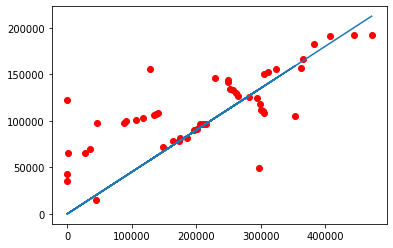

In [20]:

fig, ax = plt.subplots()
ax.plot(x, y, 'o', color='r', label = "training data")
ax.plot(x, 1 +0.45* x, label = 'h(x) = 1 + 0.45* x')

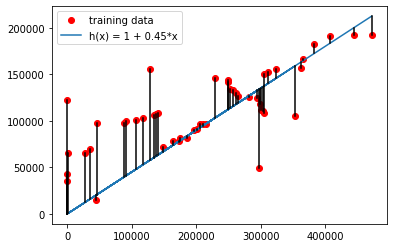

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color='r', label='training data')
ax.plot(x, 1 + 0.45*x, label='h(x) = 1 + 0.45*x')
for i in range(len(x)):
    ax.plot([x[i], x[i]], [1 + 0.45*x[i], y[i]], '-', color='0')
plt.legend()

In [22]:
def h(x, a0, a1):                             
    h = a0 + a1*x
    return h
def J(a0, a1, x, y, m):                      
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, x, y, m):                  
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(x[i],a0,a1) - y[i])
        Dja1 += (h(x[i],a0,a1) - y[i]) * x[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha):                    
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1

0.6054374239309103 0.244459361836546


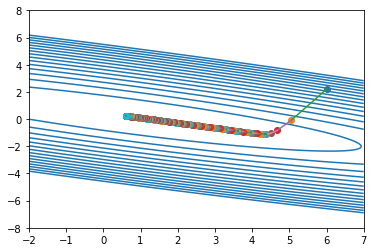

In [23]:
fig, ax = plt.subplots()
p0 = np.linspace(-2,7, 500)
p1 = np.linspace(-8,8, 500)
pa0, pa1 = np.meshgrid(p0, p1)     
ax.contour(pa0,pa1,J(pa0,pa1,x/100000,y/100000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,5)])
a0 = 6
a1 = 2.2
ax.plot(a0,a1, 'o')

for i in range(300):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/100000,y/100000,m), alpha=0.1 )
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-')
    

print(a0,a1)

In [25]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_new = (x - x_mean) / x_std           
y_new = (y - y_mean) / y_std
print(x_new,y_new)

0     2.132295
1     1.904267
2     1.610180
3     1.407916
4     1.268648
5     1.241605
6    -0.681234
7     0.922817
8     0.822536
9     0.768307
10    0.148302
11    0.316619
12    0.317395
13    0.340500
14    0.371966
15    0.415005
16    0.436020
17    0.585077
18    0.686027
19   -1.725608
20    0.716650
21    0.725423
22    0.754714
23    0.766566
24   -0.576091
25   -0.597451
26   -0.629445
27    1.162469
28   -0.759479
29   -0.849509
30   -0.980404
31   -1.004224
32   -1.348756
33    0.029518
34   -0.001860
35   -0.045036
36   -0.080941
37   -0.114446
38   -0.210646
39   -0.294592
40   -0.312612
41   -0.380687
42   -0.515364
43   -1.435035
44   -1.493907
45   -1.710039
46    0.703975
47   -1.725608
48   -1.725608
49   -1.356216
Name: Marketing Spend, dtype: float64 0     1.990990
1     1.979335
2     1.960934
3     1.758771
4     1.344094
5     1.115920
6     1.094370
7     1.085192
8     0.997344
9     0.936514
10    0.846255
11    0.800045
12    0.733706
13    0.553134
14

-2 1
-1.0000000000000004 0.8764052036533232
-0.5000000000000003 0.8133718575165182
-0.25000000000000033 0.7812248509867478
-0.1250000000000003 0.7648298776565648
-0.06250000000000024 0.7564684412581716
-0.031250000000000236 0.752204108694991
-0.015625000000000208 0.7500292990877689
-0.007812500000000208 0.7489201461880857
-0.003906250000000241 0.7483544782092472
-0.0019531250000002632 0.7480659875400396


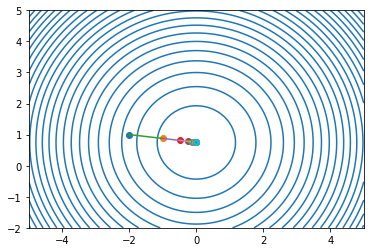

In [32]:
def plot_steps( startpt=[-2,1], alpha=.5, nsteps=10) :     # to draw contour plots and current value of theta
    fig, ax = plt.subplots()

    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)
    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) 
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') # connect the dots
        
plot_steps( startpt=[-2,1], alpha=.5, nsteps=10)

In [33]:
a0 , a1

(0.6054374239309103, 0.244459361836546)

In [34]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label = "traning data")
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()

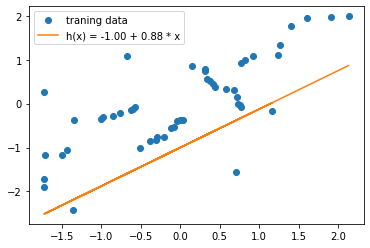

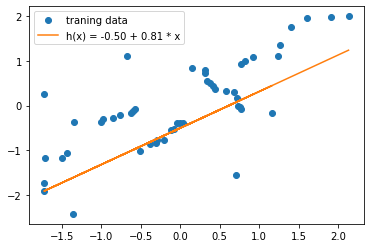

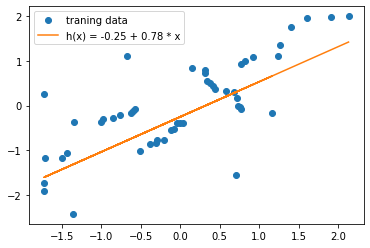

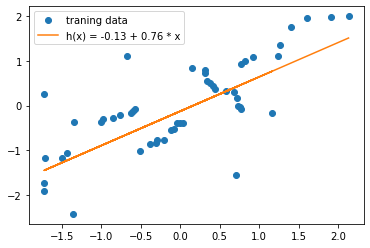

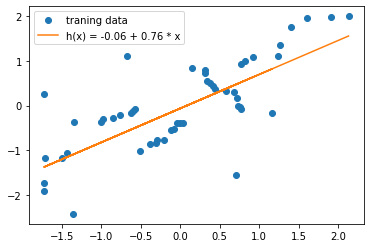

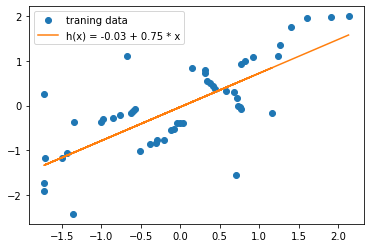

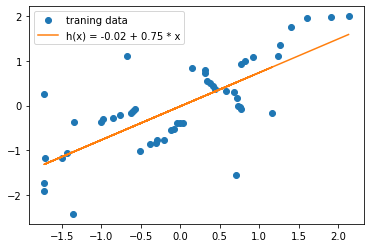

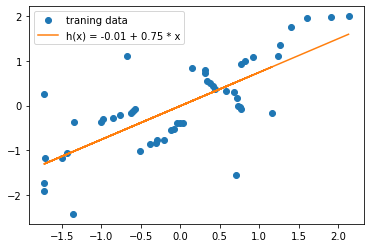

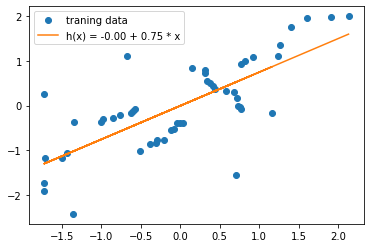

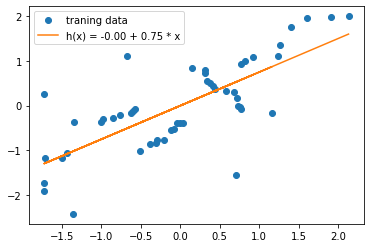

In [35]:
a0 = -2 
a1 = 1
for i in range (10) :
    a0, a1 = ap1(a0, a1, gJ = gradJ(a0, a1, x_new, y_new, m), alpha = 0.5)
    plot_graph(x_new, y_new, a0, a1)

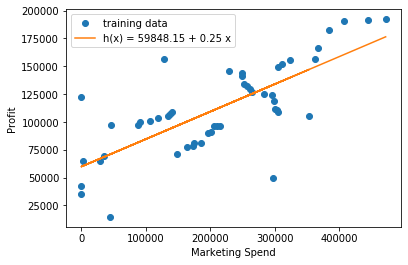

In [36]:
a0 = 0; a1 = 0.75
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Profit')
plt.legend();

In [37]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

In [40]:
a0 = 0
a1 = 0.75
predict(50000, a0, a1)

72207.93231669173